## <h2 style='color:red'>Regression  Analysis  : </h2>

- **Import liabraries and read dataset**

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline

In [146]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [147]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [148]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Checking For Null values**

In [150]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- In this dataset there is no null value present.therefore no need to fill these value

## Exploratory Data Analysis :

In [151]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


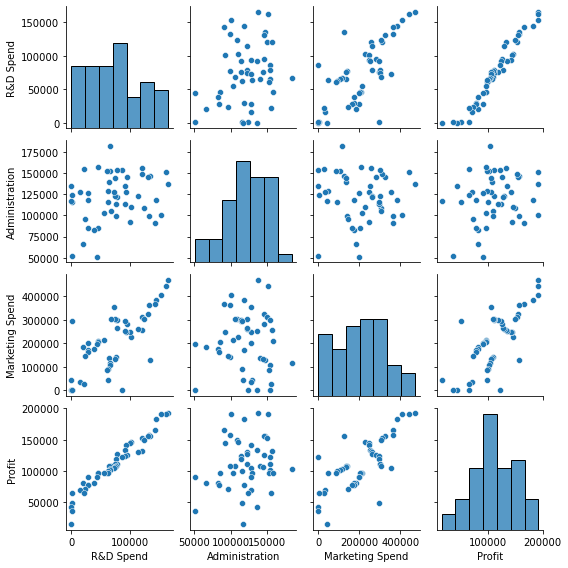

In [152]:
sns.pairplot(df,height=2);
plt.show()

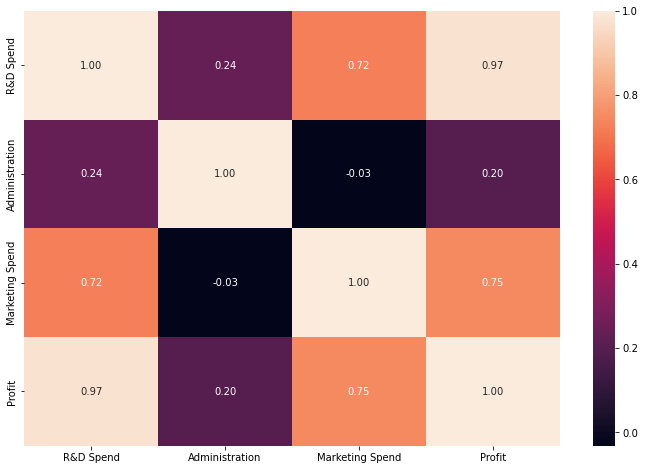

In [153]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

<h2 style='color:blue'>Categorical Values Handling  : </h2>

- **In above dataset, we can clearly see that there are five variables, in which four variables are continuous and one is categorical variable.**

- **categorical variables which are not suitable to apply directly for fitting the model. So we need to encode this variable.**

- **By using Label Encoding we can handel the Categorical value.**

In [154]:
from sklearn import preprocessing   
obj = preprocessing.LabelEncoder()  

In [155]:
df[ 'State' ]= obj.fit_transform(df[ 'State' ])   
(df[ 'State' ].unique())  

array([2, 0, 1])

In [156]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


- **Handling the Outlier :**

<AxesSubplot:xlabel='R&D Spend'>

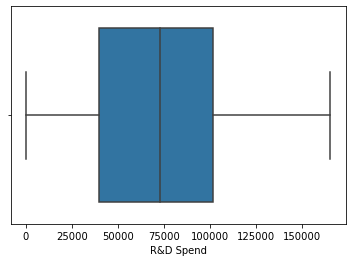

In [157]:
sns.boxplot(x='R&D Spend',data=df,orient='h')

<AxesSubplot:xlabel='Administration'>

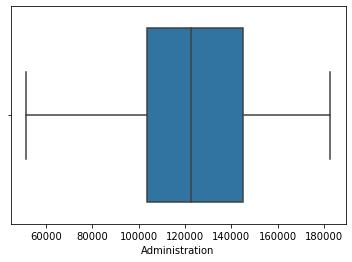

In [158]:
sns.boxplot(x='Administration',data=df,orient="h")

<AxesSubplot:xlabel='Marketing Spend'>

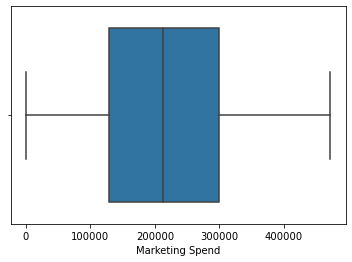

In [159]:
sns.boxplot(x='Marketing Spend',data=df,orient='h')

<AxesSubplot:xlabel='State'>

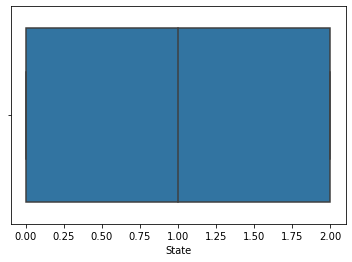

In [160]:
sns.boxplot(x='State',data=df,orient='h')

- There is no Outliers present in our dataset so no need to handle it.
- if Outliers are present in dataset then handle them by using Quartile or Z-score method.

## Handling the Skewness :

- **Reduce or remove the skewness for only those column whose correlation with the target is not good**

In [161]:
from scipy.stats import skew

R&D Spend
0.15904052321503395


C:\Users\sravh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


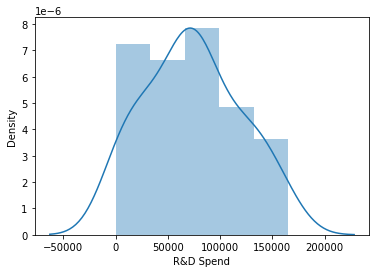

Administration
-0.4742300698920047


C:\Users\sravh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


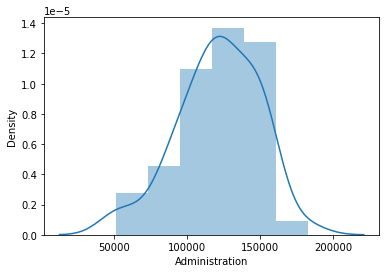

Marketing Spend
-0.04506631617666136


C:\Users\sravh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


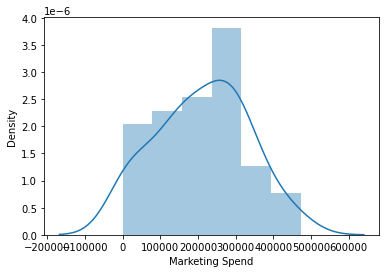

C:\Users\sravh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


State
0.0


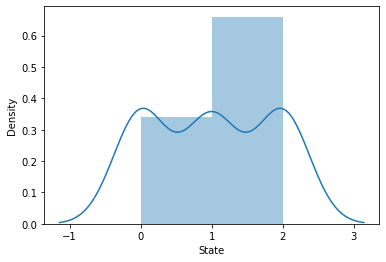

C:\Users\sravh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Profit
0.02258638356958943


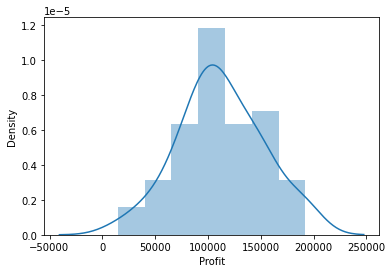

In [162]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()
          

- now here we can handle the skewness, but only those columns whose correlation is not good with our target column because when we handling the skewness it affects on the correlation.

- therefore we handle the skewness only  **Administration,Marketing Spend,State column.**

In [163]:
# handling the skewness :
df['Administration']=np.sqrt(df['Administration'])
skew(df['Administration'])

-0.8568181418818248

In [164]:
df['State']=np.sqrt(df['State'])
skew(df['State'])

-0.43590032519435823

In [165]:
df['Marketing Spend']=np.sqrt(df['Marketing Spend'])
skew(df['Marketing Spend'])

-1.0269356702266887

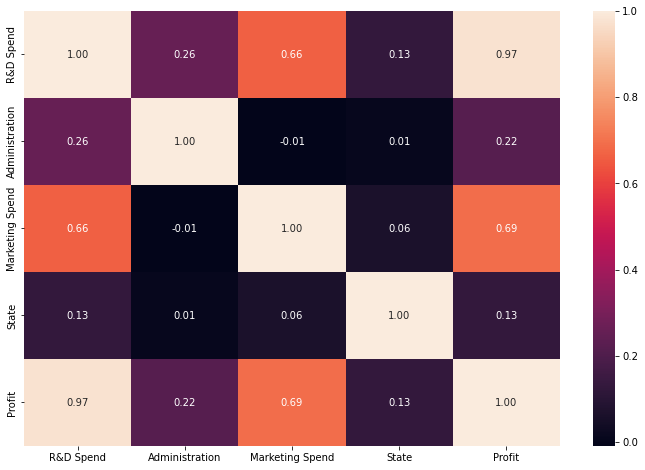

In [166]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

- **Now our data is ready to apply the Machine learning algoritm :**

- **Extracting dependent and independent Variables:**

In [167]:
# Extracting dependent and independent Variables:
X=df['R&D Spend'].values.reshape(-1,1)  

In [168]:
X.size

50

In [169]:
# dependent variable
y=df['Profit'].values

- **Now we will split the dataset into training and test Dataset.**

In [170]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0) 

- Fitting the machine learning model to the training dataset.

In [171]:
reg= LinearRegression()  

In [172]:
reg.fit(X_train, y_train)  

LinearRegression()

- **Now, we have successfully trained our model using the training dataset.**

- we will test the performance of the model using the test dataset.

In [173]:
#Predicting the Test Dataset result;  
y_test_pred= reg.predict(X_test)

In [174]:
y_train_pred=reg.predict(X_train)

- **Now we calculate the Model intercept and coefficient**

In [175]:
# printing the model intercept and coefficient
reg.intercept_
reg.coef_
print('Intercept: ', reg.intercept_)
print('Coefficient:',reg.coef_)

Intercept:  48416.297661385026
Coefficient: [0.8516228]


In [176]:
reg.predict(np.array([5]).reshape(-1,1))

array([48420.55577538])

C:\Users\sravh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


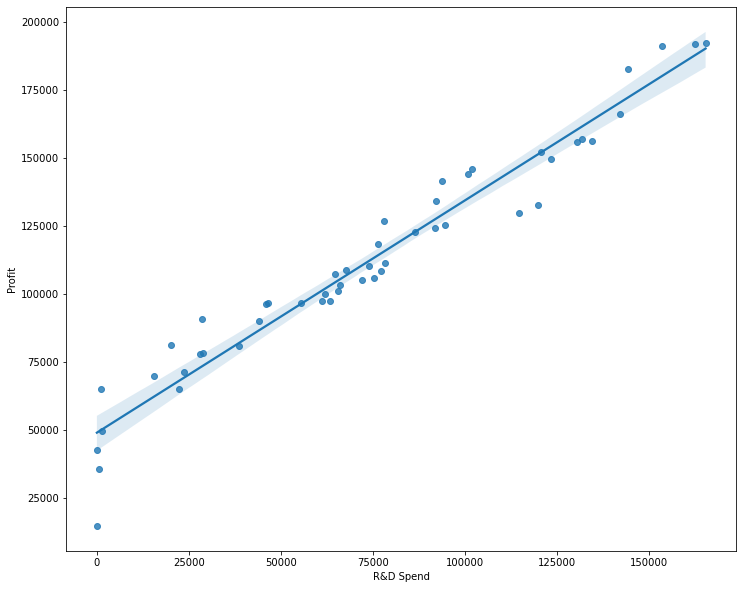

In [177]:
# best fit line
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.show()

In [178]:
# prediction for treaning and testing dataset
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [103689.91115505 134381.00844405 134993.66803583  74142.83787227
 179351.31903903 113146.78758449  68437.06457928  98882.91220072
 113866.50863458 169623.95155023]


In [179]:
#Actual values and predicted values
val_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
val_diff

,Actual value,Predicted value
0,103282.38,103689.911155
1,144259.40,134381.008444
2,146121.95,134993.668036
3,77798.83,74142.837872
4,191050.39,179351.319039
5,105008.31,113146.787584
6,81229.06,68437.064579
7,97483.56,98882.912201
8,110352.25,113866.508635
9,166187.94,169623.951550


<h2 style='color:red'> Simple Linear Regression : </h2>

In [180]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(reg.score(X,y)*100))

R squared value of the model: 94.61


<h2 style='color:green'> Evaluation Metrics : </h2>

- **print the R2 and MSE values for the model** 

- **FOR MSE :**

In [181]:
from sklearn.metrics import *

In [182]:
MSE=mean_squared_error(y_train,y_train_pred)
print('mean_squared_error',MSE)

mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error',mse)

mean_squared_error 90128072.57027796
mean_squared_error 62780624.05797684


- **FOR R2 :**

In [183]:
R2=r2_score(y_train,y_train_pred)
print('r2_score',R2)

r2=r2_score(y_test,y_pred)
print('r2_score',r2)

r2_score 0.9449589778363044
r2_score 0.9509101284256971


- **94.64% of data fit the simple linear regression model**

### Cross-validation for Simple linear regression :

**k-Fold :**

In [184]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

In [185]:
score_train = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
score_test = cross_val_score(lm,X_test,y_test,scoring='r2',cv=5)

print("Cross_v_train :",score_train)
print("Cross_v_test :",score_test)

Cross_v_train : [0.81191441 0.90128655 0.91201139 0.9215112  0.98800854]
Cross_v_test : [ 0.91330627  0.97043243  0.93409069 -0.98801112  0.89352864]


In [186]:
accuracy_train=np.mean(abs(score_train))
print("accuracy_score_train :",accuracy_train)

accuracy_test=np.mean(abs(score_test))
print("accuracy_score_test :",accuracy_test)      
      

accuracy_score_train : 0.9069464167035113
accuracy_score_test : 0.9398738308294995


<h2 style="color:blue"> Apply Regularization for more accuraccy :</h2>

- **Using Lasso Regression Model(L1 Regularization) :**

In [187]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [188]:
print("Lasso_Regression_test_score :",lasso_reg.score(X_test, y_test))

print("Lasso_Regression_train_score :",lasso_reg.score(X_train, y_train))

Lasso_Regression_test_score : 0.9464587594621938
Lasso_Regression_train_score : 0.9449589778363037


- **Using Ridge Regression Model (L2 Regularization):**

In [189]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [190]:
print ("Ridge_regression_test_score :",ridge_reg.score(X_test,y_test))

print("Ridge_regression_train_score :",ridge_reg.score(X_train,y_train))

Ridge_regression_test_score : 0.9464587607506924
Ridge_regression_train_score : 0.9449589778363044


- **Using Elasticnet Regression Model :**

In [191]:
from sklearn.linear_model import ElasticNet
Elast_reg=ElasticNet(alpha=50, max_iter=100, tol=0.1)
Elast_reg.fit(X_train,y_train)

ElasticNet(alpha=50, max_iter=100, tol=0.1)

In [192]:
print ("Elasticnet_regression_test_score :",Elast_reg.score(X_test,y_test))

print ("Elasticnet_regression_test_score :",Elast_reg.score(X_train,y_train))

Elasticnet_regression_test_score : 0.9464587595598652
Elasticnet_regression_test_score : 0.9449589778363038


- **We see that Lasso, Ridge and Elasticnet Regularizatrion prove to be beneficial when our Simple Linear Regression Model is not perform good,they gives more accuracy than simple Linear Regression**

### Cross Validation :

**KFold for Ridge**

In [193]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [194]:
lm = Ridge()

fold=KFold(n_splits=5,shuffle=True,random_state=100)

score_train=cross_val_score(lm,X_train,y_train,cv=5)
score_test=cross_val_score(lm,X_test,y_test,cv=5)

print("Cross_V_train :",score_train)
print("Cross_V__test :",score_test)

Cross_V_train : [0.81191441 0.90128655 0.91201139 0.9215112  0.98800854]
Cross_V__test : [ 0.91330627  0.97043243  0.93409069 -0.98801112  0.89352864]


In [195]:
accuracy_train=np.mean(abs(score_train))
accuracy_test=np.mean(abs(score_test))

print("accuracy_score_train :",accuracy_train)
print("accuracy_score_test :",accuracy_test)

accuracy_score_train : 0.9069464167052839
accuracy_score_test : 0.9398738306134236


<h2 style='color:red'> Multiple Linear Regression : </h2>

In [196]:
X=df[['R&D Spend','Marketing Spend']] # independent variable
y =df['Profit'] # dependent variable


In [197]:
X.head(0)

,R&D Spend,Marketing Spend


In [198]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=2) 

In [199]:
mlr= LinearRegression()

In [200]:
mlr.fit(X_train, y_train)  

LinearRegression()

In [201]:
#Predicting the Test Dataset result;  
y_test_pred= mlr.predict(X_test)  

In [202]:
y_train_pred=mlr.predict(X_train)

In [203]:
print("Prediction for test set: {}".format(y_test_pred))

Prediction for test set: [ 75825.06177863  44652.66533558 104213.72561135 154274.5353898
 128031.43069268 190665.41241436  65592.65023803  55415.09219744
  83295.09784117 109118.69178111]


In [204]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
mlr_diff

,Actual value,Predicted value
36,90708.19,75825.061779
47,42559.73,44652.665336
28,103282.38,104213.725611
9,149759.96,154274.535390
13,134307.35,128031.430693
0,192261.83,190665.412414
44,65200.33,65592.650238
46,49490.75,55415.092197
39,81005.76,83295.097841
23,108733.99,109118.691781


In [205]:
# printing the model intercept and coefficient
#Printing the model coefficients
print("Intercept :",mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

Intercept : 44652.66533558165


[('R&D Spend', 0.809148963727293), ('Marketing Spend', 17.791859885569377)]

In [206]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(mlr.score(X,y)*100))

R squared value of the model: 95.02


- **FOR MSE :**

In [207]:
MSE=mean_squared_error(y_train,y_train_pred)
print('MSE_train_set',MSE)

mse=mean_squared_error(y_test,y_pred)
print('MSE_test_set',mse)

MSE_train_set 90944171.66486803
MSE_test_set 3084885464.6228476


- **FOR R2 :**

In [208]:
R2=r2_score(y_train,y_train_pred)
print('R2_train_set',R2)

r2=r2_score(y_test,y_test_pred)
print('R2_test_set',r2)

R2_train_set 0.9378715331898451
R2_test_set 0.9832896611760213


- **95.09% OF data fit the multiple regression model**

<h2 style='color:blue'>K-Fold for Multiple Linear Regression</h2>

In [209]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

In [210]:
fold=KFold(n_splits=5,shuffle=True,random_state=2)

score_train = cross_val_score(lm, X_train, y_train, scoring='r2', cv=fold)
score_test = cross_val_score(lm,X_test,y_test,scoring='r2',cv=fold)

print("Cross_v_train :",score_train)
print("Cross_v_test :",score_test)

Cross_v_train : [0.944517   0.80546208 0.8138877  0.96067737 0.91182818]
Cross_v_test : [0.98807544 0.94063616 0.79036894 0.98511162 0.95118121]


In [211]:
accuracy_train=np.mean(abs(score_train))
print("accuracy_score_train :",accuracy_train)

accuracy_test=np.mean(abs(score_test))
print("accuracy_score_test :",accuracy_test) 

accuracy_score_train : 0.8872744664984298
accuracy_score_test : 0.9310746744151182


<h2 style="color:red">Regularization for Multiple Linear Regression :</h2>

- **Using Lasso Regression Model(L1 Regularization) :**

In [212]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [213]:
print("Lasso_Regression_test_score :",lasso_reg.score(X_test, y_test))

print("Lasso_Regression_train_score :",lasso_reg.score(X_train, y_train))

Lasso_Regression_test_score : 0.9832187947238761
Lasso_Regression_train_score : 0.9378594996562619


- **Using Ridge Regression Model (L2 Regularization):**

In [214]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [215]:
print ("Ridge_regression_test_score :",ridge_reg.score(X_test,y_test))

print("Ridge_regression_train_score :",ridge_reg.score(X_train,y_train))

Ridge_regression_test_score : 0.9832895283464417
Ridge_regression_train_score : 0.9378715331673816


- **Using Elasticnet Regression Model :**

In [216]:
from sklearn.linear_model import ElasticNet
Elast_reg=ElasticNet(alpha=50, max_iter=100, tol=0.1)
Elast_reg.fit(X_train,y_train)

ElasticNet(alpha=50, max_iter=100, tol=0.1)

In [217]:
print ("Elasticnet_regression_test_score :",Elast_reg.score(X_test,y_test))

print ("Elasticnet_regression_train_score :",Elast_reg.score(X_train,y_train))

Elasticnet_regression_test_score : 0.9832162204477153
Elasticnet_regression_train_score : 0.9378591806969481


- **Applying K-Fold for Elasticnet Regression Model**

In [218]:
Es = ElasticNet()
fold=KFold(n_splits=5,shuffle=True,random_state=2)

score_train=cross_val_score(Es,X_train,y_train,cv=fold)
score_test=cross_val_score(Es,X_test,y_test,cv=fold)

print(score_train)
print(score_test)

[0.94451692 0.80547301 0.81388692 0.96067731 0.91182815]
[0.98807511 0.94063593 0.79038292 0.98511151 0.95118272]


In [219]:
accuracy_train=np.mean(abs(score_train))
print("accuracy_score_train :",accuracy_train)

accuracy_test=np.mean(abs(score_test))
print("accuracy_score_test :",accuracy_test) 

accuracy_score_train : 0.8872764602987597
accuracy_score_test : 0.9310776393046215
